# Анализ эффективности удержания

В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний  о пользователях, которые потенциально могут уйти.

state — штат США

account_length — длительность использования аккаунта

area_code — деление пользователей на псевдорегионы, использующееся в телекоме

intl_plan — подключена ли у пользователя услуга международного общения

vmail_plan — подключена ли у пользователя услуга голосовых сообщений

vmail_message — количество голосых сообщений, который пользователь отправил / принял

day_calls — сколько пользователь совершил дневных звонков

day_mins — сколько пользователь проговорил минут в течение дня

day_charge — сколько пользователь заплатил за свою дневную активность

eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности

night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности

intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения

custserv_calls — сколько раз пользователь позвонил в службу поддержки

treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)

mes_estim — оценка интенсивности пользования интернет мессенджерами

churn — результат оттока: перестал ли абонент пользоваться услугами оператора

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [43]:
churn = pd.read_csv('churn_analysis.csv', index_col = 0)
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


# #1

Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора. 

Для этого мы воспользуемся критерием хи-квадрат.  Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn.  Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции 

In [44]:
states = churn.state.unique()
n_states = len(states)
n_pairs = n_states * (n_states - 1) / 2
print(states, n_pairs)

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 1275.0


заметим, что целевая переменная - строка. исправим это

In [45]:
churn.churn.replace('False.', 0, inplace = True)
churn.churn.replace('True.', 1, inplace = True)
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,0


In [41]:
control = churn[churn.treatment == 1]
p_vals = {}

#счётчик для проверки
count = 0

for i in range(n_states):
    for j in range(i + 1, n_states):
        count += 1
        cont_table = pd.DataFrame(index = [states[i], states[j]], columns = ['no_churn', 'churn'])

        cont_table.loc[states[i], 'churn'] = control[control.state == states[i]].churn.sum()
        cont_table.loc[states[i], 'no_churn'] = control.groupby(states[i]).count().churn - cont_table.loc[states[i], 'churn']

        cont_table.loc[states[j], 'churn'] = control[control.state == states[j]].churn.sum()
        cont_table.loc[states[j], 'no_churn'] = control.shape[0] - cont_table.loc[states[j], 'churn']

        p_vals["-".join([states[i], states[j]])] = sts.chi2_contingency(cont_table, correction = False)[1]

print(count)

KeyError: 'KS'

In [7]:
p_vals

{'KS-OH': 0.09490044391867053,
 'KS-NJ': 0.36450721988840296,
 'KS-OK': 0.09490044391867053,
 'KS-AL': 0.5626325784266386,
 'KS-MA': 1.0,
 'KS-MO': 0.36450721988840296,
 'KS-LA': 0.008049603595084972,
 'KS-WV': 0.5626325784266386,
 'KS-IN': 0.204868090751923,
 'KS-RI': 0.36450721988840296,
 'KS-IA': 0.09490044391867053,
 'KS-MT': 0.36450721988840296,
 'KS-NY': 0.7808776777844366,
 'KS-ID': 0.09490044391867053,
 'KS-VT': 0.5626325784266386,
 'KS-VA': 0.204868090751923,
 'KS-TX': 0.7808776777844366,
 'KS-FL': 0.09490044391867053,
 'KS-CO': 0.5626325784266386,
 'KS-AZ': 0.09490044391867053,
 'KS-SC': 0.5626325784266386,
 'KS-NE': 0.204868090751923,
 'KS-WY': 0.09490044391867053,
 'KS-HI': 0.03357005765050031,
 'KS-IL': 0.03357005765050031,
 'KS-NH': 0.09490044391867053,
 'KS-GA': 0.09490044391867053,
 'KS-AK': 0.03357005765050031,
 'KS-MD': 0.5626325784266386,
 'KS-AR': 0.5626325784266386,
 'KS-WI': 0.09490044391867053,
 'KS-OR': 0.204868090751923,
 'KS-MI': 0.5626325784266386,
 'KS-DE': 

In [8]:
np.sum([True if p < 0.05 else False for p in p_vals.values()])

49

# #2

Какие проблемы Вы видите в построении анализа  из первого вопроса? Отметьте все верные утверждения. 

# #3

В основе критерия xи-квадрат лежит предположение о том, что если верна нулевая гипотеза, то дискретное биномиальное распределение данных по клеткам в  таблице сопряженности  может быть аппроксимировано с помощью непрерывного распределения xи-квадрат.  Однако точность такой аппроксимации существенно зависит от суммарного количества наблюдений и их распределения в этой таблице (отсюда и ограничения при использовании критерия xи-квадрат).

Одним из способов коррекции точности аппроксимации является поправка Йетса на непрерывность.  Эта поправка заключается в  вычитании константы 0.5  из каждого модуля разности наблюденного  O_i O 
i
​
  и ожидаемого  E_i E 
i
​
  значений, то есть, статистика с такой поправкой выглядит так: 


  В основе критерия xи-квадрат лежит предположение о том, что если верна нулевая гипотеза, то дискретное биномиальное распределение данных по клеткам в  таблице сопряженности  может быть аппроксимировано с помощью непрерывного распределения xи-квадрат.  Однако точность такой аппроксимации существенно зависит от суммарного количества наблюдений и их распределения в этой таблице (отсюда и ограничения при использовании критерия xи-квадрат).

Одним из способов коррекции точности аппроксимации является поправка Йетса на непрерывность.  Эта поправка заключается в  вычитании константы 0.5  из каждого модуля разности наблюденного  O_i O 
i
​
  и ожидаемого  E_i E 
i
​
  значений, то есть, статистика с такой поправкой выглядит так: 

In [10]:
p_vals_corr = {}

#счётчик для проверки
count = 0

for i in range(n_states):
    for j in range(i + 1, n_states):
        count += 1
        contingency_table = pd.DataFrame(index = [states[i], states[j]], columns = ['no_churn', 'churn'])
        
        contingency_table.loc[states[i], 'churn'] = control[control.state == states[i]].churn.sum()
        contingency_table.loc[states[i], 'no_churn'] = control.shape[0] - contingency_table.loc[states[i], 'churn']

        contingency_table.loc[states[j], 'churn'] = control[control.state == states[j]].churn.sum()
        contingency_table.loc[states[j], 'no_churn'] = control.shape[0] - contingency_table.loc[states[j], 'churn']

        p_vals_corr["-".join([states[i], states[j]])] = sts.chi2_contingency(contingency_table, correction = True)[1]

print(count)

1275


In [11]:
np.sum([True if p < 0.05 else False for p in p_vals_corr.values()])

13

проверим, все ли скоректированные значения больше значений без поправки

In [12]:
np.sum([True if x[1] >= x[0] else False for x in zip(p_vals.values(), p_vals_corr.values())])

1275

# #4

Что если у нас мало данных,  мы не хотим использовать аппроксимацию дискретного распределения непрерывным и использовать сомнительную поправку,  предположения  критерия xи-квадрат не выполняются, а проверить гипотезу о том, что данные принадлежат одному распределению, нужно ?

В таком случае прибегают к так называемому точному критерию Фишера. Этот  критерий не использует приближений  и в точности вычисляет значение достигаемого уровня значимости используя комбинаторный подход.

Тогда вероятность получить именно такие a, b, c, da,b,c,d при фиксированных значениях сумм по строкам и по столбцам) задается выражением

В числителе этой дроби стоит суммарное количество способов выбрать aa и cc из a +b a+b и c + dc+d соответственно. А в знаменателе — количество способов выбрать число объектов, равное сумме элементов первого столбца a + ca+c из общего количества рассматриваемых объектов nn.

Чтобы посчитать достигаемый уровень значимости критерия Фишера, нужно перебрать все возможные значения a, b, c, d a,b,c,d, в клетках этой таблицы так, чтобы построковые и постолбцовые суммы не изменились. Для каждого такого набора a, b, c, d a,b,c,d нужно вычислить значение  p_i p 
i
​
  по формуле выше и просуммировать все такие значения  p_i p 
i
​
 , которые меньше или равны  pp, которое мы вычислили по наблюдаемым значениям a, b, c, d a,b,c,d.

Понятно, что такой критерий вычислительно неудобен в силу большого количества факториалов в формуле выше. То есть даже при небольших выборках для вычисления значения этого критерия приходится оперировать очень большими числами. Поэтому данным критерием пользуются обычно только для таблиц 2x2, но сам критерий никак не ограничен количеством строк и столбцов, и его можно построить для любой таблицы n\times mn×m.

Посчитайте для каждой пары штатов, как и в первом задании, достигаемый уровень значимости с помощью точного критерия Фишера и сравните получившиеся значения с двумя другими подходами, описанными выше.

In [14]:
p_vals_fish = {}

#счётчик для проверки
count = 0

for i in range(n_states):
    for j in range(i + 1, n_states):
        count += 1
        contingency_table = pd.DataFrame(index = [states[i], states[j]], columns = ['no_churn', 'churn'])

        contingency_table.loc[states[i], 'churn'] = control[control.state == states[i]].churn.sum()
        contingency_table.loc[states[i], 'no_churn'] = control.shape[0] - contingency_table.loc[states[i], 'churn']

        contingency_table.loc[states[j], 'churn'] = control[control.state == states[j]].churn.sum()
        contingency_table.loc[states[j], 'no_churn'] = control.shape[0] - contingency_table.loc[states[j], 'churn']

        p_vals_fish["-".join([states[i], states[j]])] = sts.fisher_exact(contingency_table)[1]

print(count)

1275


In [15]:
print("fisher mean p_vals: %f" %np.mean(list(p_vals_fish.values())))
print("chi2_corr mean p_vals: %f" %np.mean(list(p_vals_corr.values())))
print("chi2 mean p_vals: %f" %np.mean(list(p_vals.values())))


fisher mean p_vals: 0.679086
chi2_corr mean p_vals: 0.678063
chi2 mean p_vals: 0.481422


# #5

Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике. 

Рассмотрим пару признаков day_calls и  mes_estim. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость. 

In [16]:
day_mes_corr_p = churn.corr(method = 'pearson').loc['day_calls', 'mes_estim']
day_mes_corr_p

-0.051794350587572674

In [17]:
sts.pearsonr(churn.day_calls.values, churn.mes_estim.values)

(-0.05179435058757252, 0.0027798836869732313)

# #6

In [18]:
day_mes_corr_s = churn.corr(method = 'spearman').loc['day_calls', 'mes_estim']
day_mes_corr_s

0.043349880533927444

In [19]:
sts.spearmanr(churn.day_calls.values, churn.mes_estim.values)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170543)

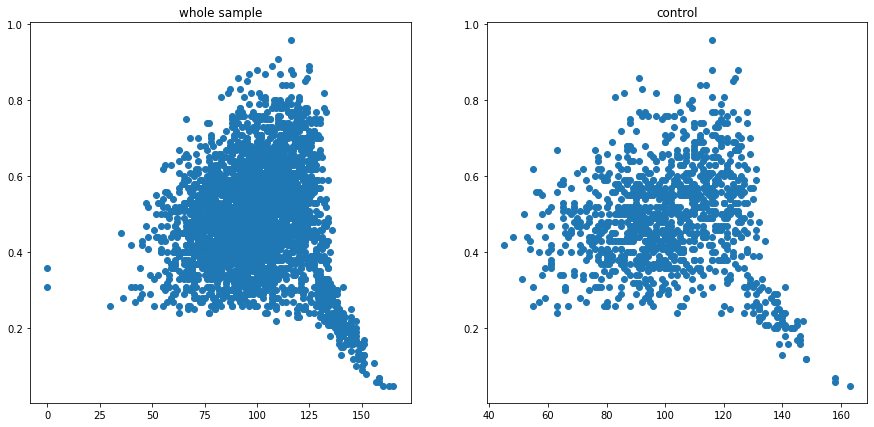

In [20]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.scatter(churn.day_calls, churn.mes_estim)
plt.title('whole sample')

plt.subplot(1, 2, 2)
plt.scatter(control.day_calls, control.mes_estim)
plt.title('control')

plt.show()

# #8

Посчитайте значение коэффицента корреляции Крамера между двумя признаками:  штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1).  Что можно сказать о достигаемом уровне значимости при проверке гипотезы о равенство нулю этого коэффициента?

In [23]:
cont_table = pd.DataFrame(index = states, columns = ['no_churn', 'churn'])


In [32]:
cont_table['churn'] = control.groupby('state').sum().churn
cont_table.head(10)

,no_churn,churn
KS,18,7
OH,22,2
NJ,20,4
OK,11,2
AL,25,5
MA,17,7
MO,17,4
LA,15,0
WV,27,5
IN,20,3


In [33]:
cont_table['no_churn'] = control.groupby('state').count().churn - control.groupby('state').sum().churn
cont_table.head(10)

,no_churn,churn
KS,18,7
OH,22,2
NJ,20,4
OK,11,2
AL,25,5
MA,17,7
MO,17,4
LA,15,0
WV,27,5
IN,20,3


In [38]:
X2, p_value = sts.chi2_contingency(cont_table, correction = False)[0], sts.chi2_contingency(cont_table, correction = False)[1]
expected = sts.chi2_contingency(cont_table, correction = False)[3]
n = control.shape[0]
min_dim = 2 - 1

V_cram = np.sqrt(X2 / (n * min_dim))
print(V_cram, p_value)

0.2003932150203332 0.709759004277847


In [39]:
expected

array([[20.89790337,  4.10209663],
       [20.06198724,  3.93801276],
       [20.06198724,  3.93801276],
       [10.86690975,  2.13309025],
       [25.07748405,  4.92251595],
       [20.06198724,  3.93801276],
       [17.55423883,  3.44576117],
       [12.53874202,  2.46125798],
       [26.74931632,  5.25068368],
       [19.2260711 ,  3.7739289 ],
       [18.39015497,  3.60984503],
       [12.53874202,  2.46125798],
       [21.73381951,  4.26618049],
       [27.58523245,  5.41476755],
       [15.04649043,  2.95350957],
       [19.2260711 ,  3.7739289 ],
       [19.2260711 ,  3.7739289 ],
       [16.7183227 ,  3.2816773 ],
       [16.7183227 ,  3.2816773 ],
       [18.39015497,  3.60984503],
       [15.88240656,  3.11759344],
       [17.55423883,  3.44576117],
       [20.06198724,  3.93801276],
       [18.39015497,  3.60984503],
       [10.86690975,  2.13309025],
       [10.03099362,  1.96900638],
       [10.03099362,  1.96900638],
       [17.55423883,  3.44576117],
       [16.7183227 ,